# Importing all the important libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing and analyzing the dataset

In [2]:
df = pd.read_csv("IRIS.csv")
print("Data imported")

Data imported


In [3]:
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
print(df.shape)

(150, 5)


In [6]:
print(df.isna().sum())

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64


# Data Visualization

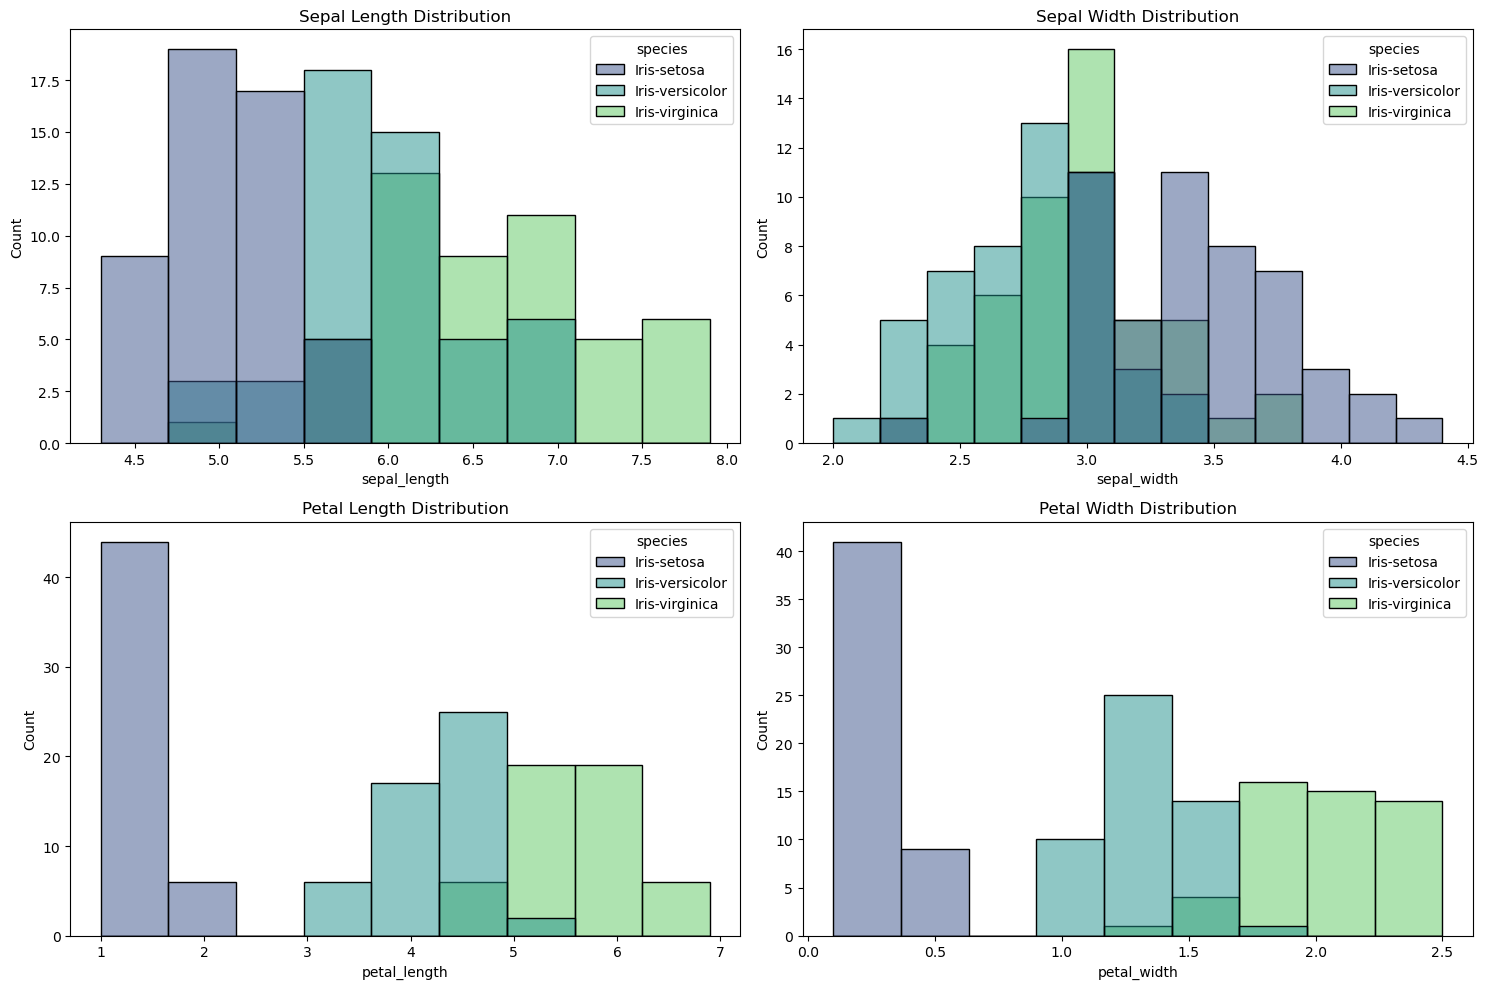

In [7]:
palette = "viridis"

plt.figure(figsize=(15, 10))

# Histograms for sepal length, sepal width, petal length, and petal width
plt.subplot(2, 2, 1)
sns.histplot(data=df, x="sepal_length", hue="species", palette=palette)
plt.title("Sepal Length Distribution")

plt.subplot(2, 2, 2)
sns.histplot(data=df, x="sepal_width", hue="species", palette=palette)
plt.title("Sepal Width Distribution")

plt.subplot(2, 2, 3)
sns.histplot(data=df, x="petal_length", hue="species", palette=palette)
plt.title("Petal Length Distribution")

plt.subplot(2, 2, 4)
sns.histplot(data=df, x="petal_width", hue="species", palette=palette)
plt.title("Petal Width Distribution")

plt.tight_layout()



Text(0.5, 1.0, 'Sepal Length Box Plot')

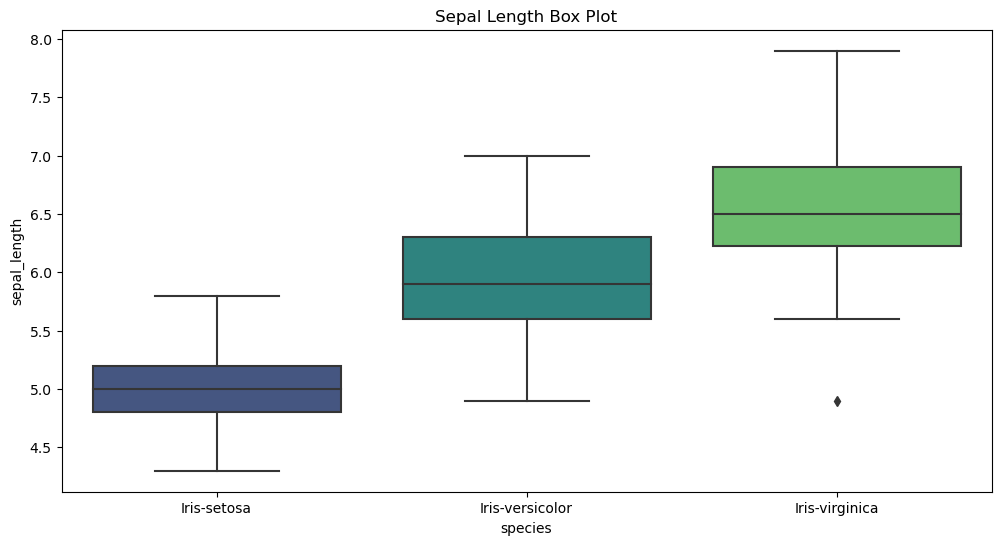

In [8]:
# Box plots for each feature
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="sepal_length", palette=palette)
plt.title("Sepal Length Box Plot")

Text(0.5, 1.0, 'Sepal Width Box Plot')

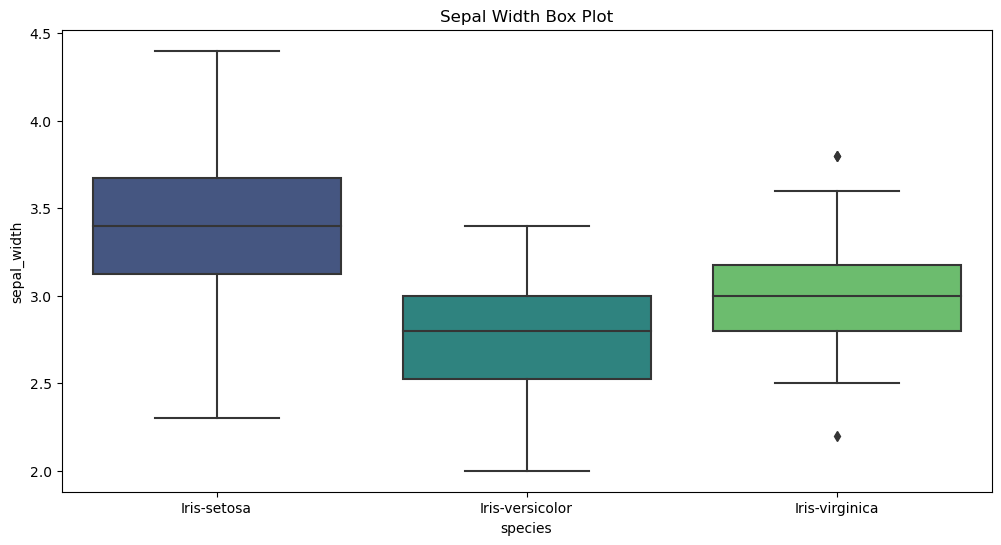

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="sepal_width", palette=palette)
plt.title("Sepal Width Box Plot")

Text(0.5, 1.0, 'Petal Length Box Plot')

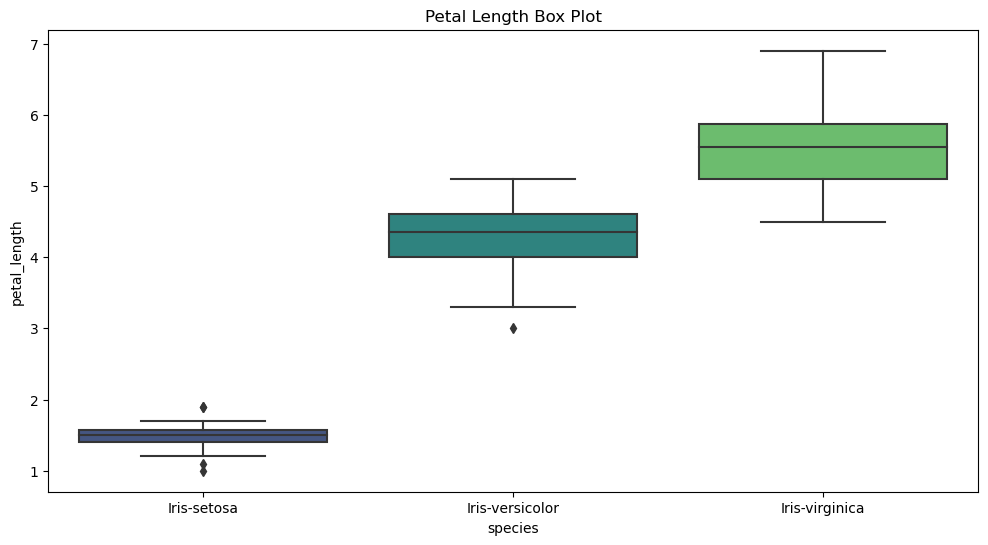

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="petal_length", palette=palette)
plt.title("Petal Length Box Plot")

Text(0.5, 1.0, 'Petal Width Box Plot')

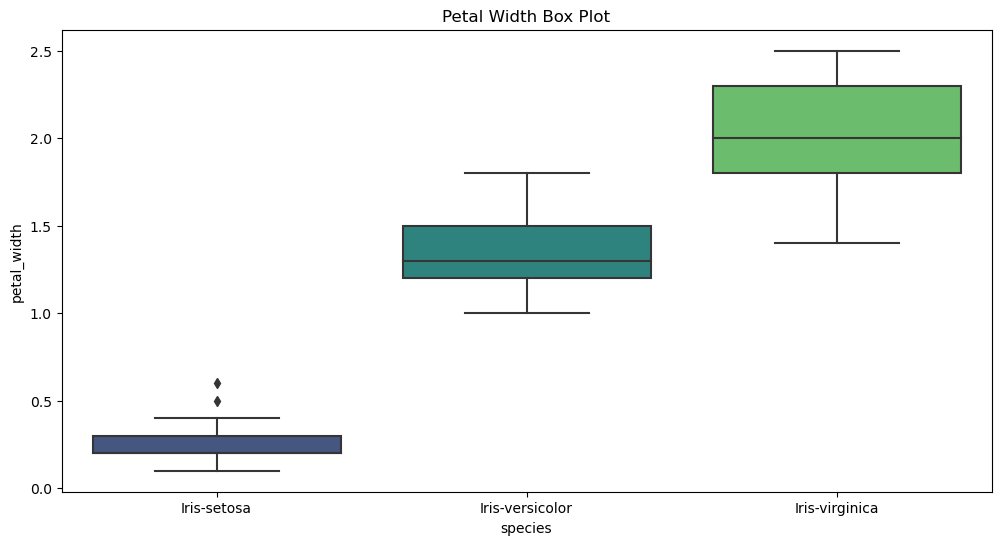

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="species", y="petal_width", palette=palette)
plt.title("Petal Width Box Plot")

<Figure size 640x480 with 0 Axes>

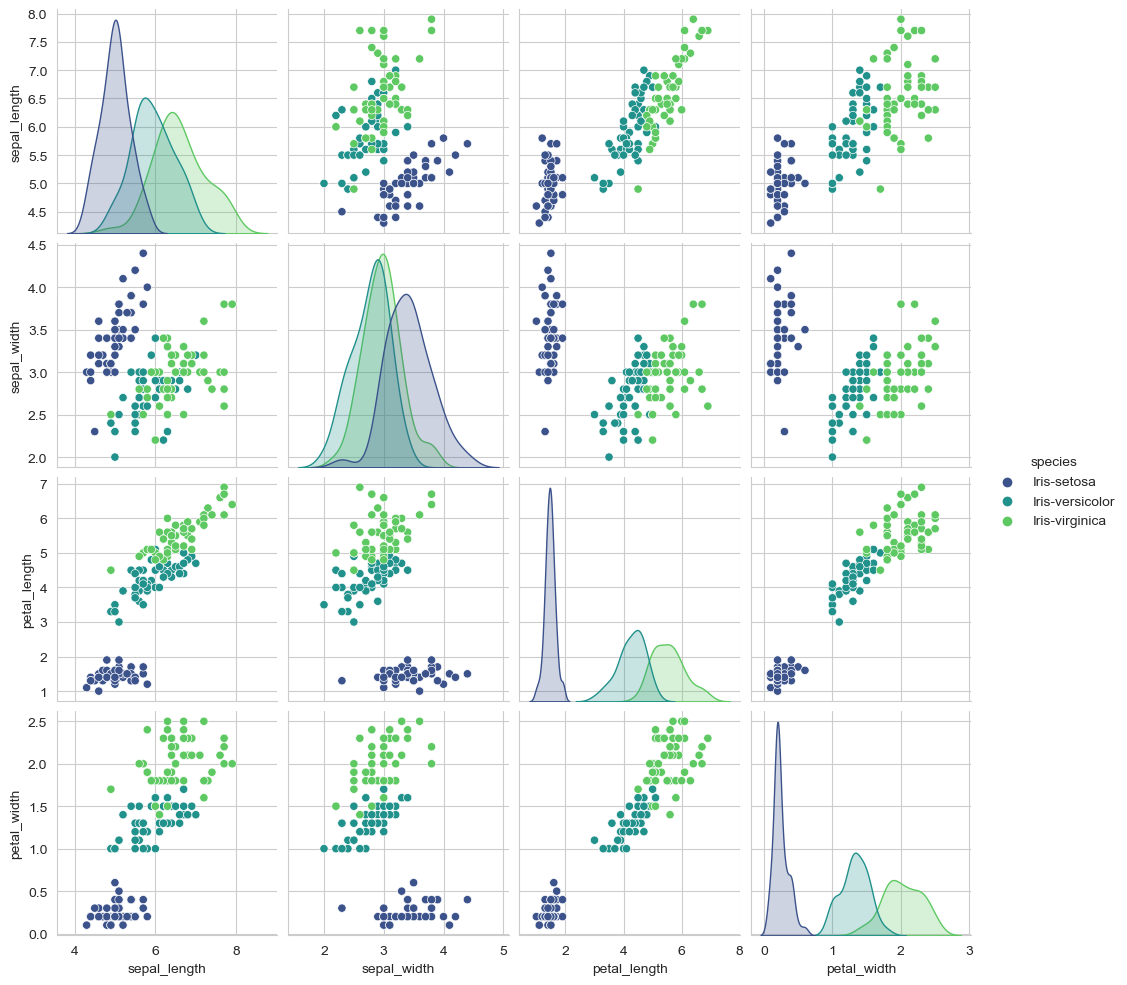

In [12]:
plt.tight_layout()
sns.set_style('whitegrid')
sns.pairplot(df, hue='species', palette=palette)
plt.show()

# Models

In [13]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

In [14]:
Y = df['species']
X = df.drop('species',axis =1)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
X_train

sepal_length  sepal_width  petal_length  petal_width
96            5.7          2.9           4.2          1.3
105           7.6          3.0           6.6          2.1
66            5.6          3.0           4.5          1.5
0             5.1          3.5           1.4          0.2
122           7.7          2.8           6.7          2.0
..            ...          ...           ...          ...
71            6.1          2.8           4.0          1.3
106           4.9          2.5           4.5          1.7
14            5.8          4.0           1.2          0.2
92            5.8          2.6           4.0          1.2
102           7.1          3.0           5.9          2.1

[100 rows x 4 columns]

# Using LogisticRegression

In [16]:
model = LogisticRegression()
model.fit(X_train, Y_train)
model_comp={}
prediction = model.predict(X_test)
print('Accuracy:',metrics.accuracy_score(prediction,Y_test)*100,'%')
model_comp['logistic regression']=[accuracy_score(prediction,Y_test)]

Accuracy: 100.0 %


# Using Support Vector

In [17]:
from sklearn.svm import SVC
model1 = SVC()
model1.fit(X_train,Y_train)
Y_pred = model1.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(Y_test,Y_pred)*100,'%')
model_comp['SVC']=[accuracy_score(Y_pred,Y_test)]

Accuracy : 100.0 %


# Using KNN Neighbors

In [18]:
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(X_train,Y_train)
Y_pred2 = model2.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy :",accuracy_score(Y_test,Y_pred2)*100,'%')
model_comp['KNN']=[accuracy_score(Y_pred2,Y_test)]

Accuracy : 98.0 %


# Using GaussianNB

In [19]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
Y_pred3 = model3.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred3)*100,'%')
model_comp['GaussianNB']=[accuracy_score(Y_pred3,Y_test)]

Accuracy Score: 96.0 %


# Using Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(X_train,Y_train)
Y_pred4 = model4.predict(X_test)
from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,Y_pred4)*100,'%')
model_comp['Decision Tree']=[accuracy_score(Y_pred4,Y_test)]

Accuracy Score: 98.0 %


In [21]:
df1=pd.DataFrame.from_dict(model_comp).T
df1.columns=['Accuracy']
df1=df1.sort_values('Accuracy',ascending=True)
df1.style.background_gradient(cmap='Greens')